<a href="https://colab.research.google.com/github/Mahmuda-104/Thesis/blob/main/CNN_All_Filter_curve6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
from scipy.io import loadmat

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/My Drive/Data'

In [4]:
import os
import scipy.io
import numpy as np
from scipy import signal

lowcut = 0.4 
highcut = 100  
fs_original = 500
fs_new = 250

control_data = []
control_path = os.path.join(data_path, 'Control')
for foldername in os.listdir(control_path):
    subfolder_path = os.path.join(control_path, foldername)
    control_data.append(subfolder_path)

Control30 = []
for control_data_path in control_data:
    n_epochs = 55 #len([f for f in os.listdir(control_data_path) if f.endswith('.mat')])
    control_arr = []
    for i in range(1, n_epochs+1):
        epoch_path = f"{control_data_path}/trial{i}.mat"
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]
        
        # Average referencing
        average_potential = np.mean(mat_data1, axis=0, keepdims=True)
        referenced_data = mat_data1 - average_potential
        
        # Bandpass filtering
        b, a = signal.butter(4, [lowcut, highcut], fs=fs_original, btype='band')
        filtered_data = signal.filtfilt(b, a, referenced_data, axis=-1)
        
        # Apply notch filter
        f0 = 60  # Frequency to be removed (e.g., power line interference)
        Q = 30   # Quality factor
        w0 = f0 / (fs_original / 2)
        b, a = signal.iirnotch(w0, Q)
        filtered_data = signal.filtfilt(b, a, filtered_data, axis=-1)

        # Downsampling
        num_samples_original = filtered_data.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(filtered_data, num_samples_new, axis=-1)
        
        control_arr.append(np.array(downsampled_data))
        
    Control30.append(np.array(control_arr))

Control30 = np.array(Control30)
print(Control30[0].shape)


(55, 60, 1000)


In [5]:
print("Filtered and downsampled data shape:", Control30.shape)

Filtered and downsampled data shape: (32, 55, 60, 1000)


In [6]:
import os
import scipy.io
import numpy as np
from scipy import signal

lowcut = 0.4
highcut = 100  
fs_original = 500
fs_new = 250  

concussed_data = []
concussed_path = os.path.join(data_path, 'Concussed')
for foldername in os.listdir(concussed_path):
    subfolder_path = os.path.join(concussed_path, foldername)
    concussed_data.append(subfolder_path)

Concussed52 = []
for concussed_data_path in concussed_data:
    n_epochs = 55 #len([f for f in os.listdir(control_data_path) if f.endswith('.mat')])
    concussed_arr = []
    for i in range(1, n_epochs+1):
        epoch_path = f"{concussed_data_path}/trial{i}.mat"
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]
        
        # Average referencing
        average_potential = np.mean(mat_data1, axis=0, keepdims=True)
        referenced_data = mat_data1 - average_potential
        
        # Bandpass filtering
        b, a = signal.butter(4, [lowcut, highcut], fs=fs_original, btype='band')
        filtered_data = signal.filtfilt(b, a, referenced_data, axis=-1)
        
        # Apply notch filter
        f0 = 60  # Frequency to be removed (e.g., power line interference)
        Q = 30   # Quality factor
        w0 = f0 / (fs_original / 2)
        b, a = signal.iirnotch(w0, Q)
        filtered_data = signal.filtfilt(b, a, filtered_data, axis=-1)

        # Downsampling
        num_samples_original = filtered_data.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(filtered_data, num_samples_new, axis=-1)
        
        concussed_arr.append(np.array(downsampled_data))
        
    Concussed52.append(np.array(concussed_arr))

Concussed52 = np.array(Concussed52)
print(Concussed52[0].shape)

(55, 60, 1000)


In [7]:
print("Filtered and downsampled data shape:", Concussed52.shape)

Filtered and downsampled data shape: (52, 55, 60, 1000)


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
dataset = np.concatenate((Control30, Concussed52), axis=0)

#(0 for control, 1 for concussed)
labels = np.concatenate((np.zeros(len(Control30)), np.ones(len(Concussed52))))

In [9]:
train_ratio = 0.7  # 80% for training
val_ratio = 0.15   # 10% for validation
test_ratio = 0.15  # 10% for testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=test_ratio, stratify=labels, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), stratify=y_train, random_state=42)

Epoch 1/100
2/2 [==============================] - 39s 19s/step - loss: 1924908.3750 - accuracy: 0.4310 - val_loss: 4092.8142 - val_accuracy: 0.3846
Epoch 2/100
2/2 [==============================] - 39s 18s/step - loss: 4020.5239 - accuracy: 0.3966 - val_loss: 0.6870 - val_accuracy: 0.6154
Epoch 3/100
2/2 [==============================] - 39s 20s/step - loss: 0.6881 - accuracy: 0.5517 - val_loss: 0.9534 - val_accuracy: 0.3846
Epoch 4/100
2/2 [==============================] - 37s 18s/step - loss: 0.7862 - accuracy: 0.5345 - val_loss: 0.6738 - val_accuracy: 0.6154
Epoch 5/100
2/2 [==============================] - 39s 18s/step - loss: 0.6760 - accuracy: 0.6207 - val_loss: 0.6679 - val_accuracy: 0.6154
Epoch 6/100
2/2 [==============================] - 37s 18s/step - loss: 0.6611 - accuracy: 0.6379 - val_loss: 0.6726 - val_accuracy: 0.6154
Epoch 7/100
2/2 [==============================] - 42s 18s/step - loss: 18.4272 - accuracy: 0.6034 - val_loss: 0.6672 - val_accuracy: 0.6154
Epoch 8

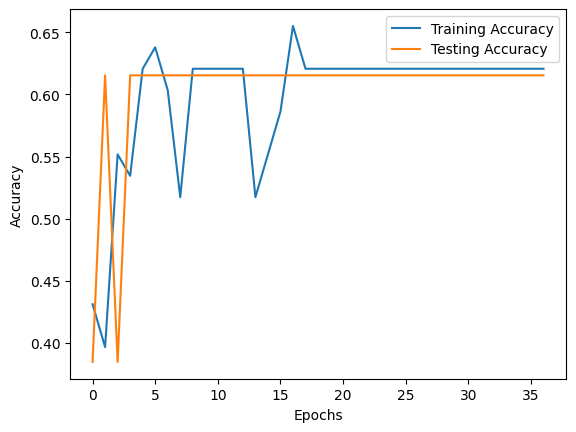

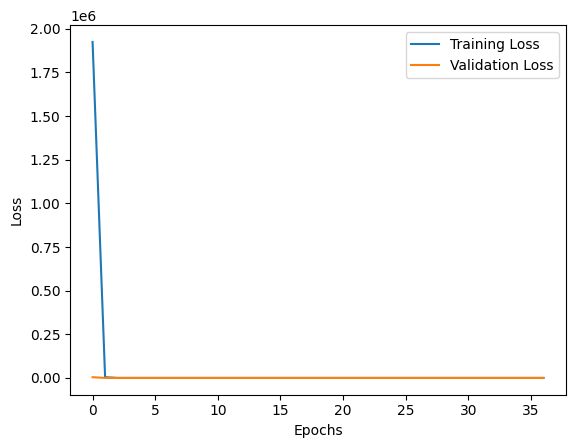

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Normalize the input data
# X_train = X_train / 255.0
# X_val = X_val / 255.0
# X_test = X_test / 255.0
input_shape = X_train.shape[1:]
# Build the CNN model
model = tf.keras.Sequential()
model.add(layers.Conv2D(16, kernel_size=(6, 6), strides=1, activation='relu', padding='same', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

learning_rate = 0.05
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

# Generate training and testing accuracy
training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']

# Generate learning curve
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and testing accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(testing_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot learning curve
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/100
2/2 [==============================] - 43s 18s/step - loss: 146484.5625 - accuracy: 0.5000 - val_loss: 47218.7266 - val_accuracy: 0.6154
Epoch 2/100
2/2 [==============================] - 38s 17s/step - loss: 11070.4648 - accuracy: 0.6207 - val_loss: 195.9609 - val_accuracy: 0.6154
Epoch 3/100
2/2 [==============================] - 35s 17s/step - loss: 0.6978 - accuracy: 0.6207 - val_loss: 17102.9219 - val_accuracy: 0.6154
Epoch 4/100
2/2 [==============================] - 38s 18s/step - loss: 246.2586 - accuracy: 0.6207 - val_loss: 63338.4727 - val_accuracy: 0.6154
Epoch 5/100
2/2 [==============================] - 36s 18s/step - loss: 9970.4443 - accuracy: 0.6207 - val_loss: 126181.1719 - val_accuracy: 0.6154
Epoch 6/100
2/2 [==============================] - 38s 18s/step - loss: 0.6774 - accuracy: 0.6207 - val_loss: 200047.4688 - val_accuracy: 0.6154
Epoch 7/100
2/2 [==============================] - 37s 18s/step - loss: 0.6640 - accuracy: 0.6207 - val_loss: 273067.4688 

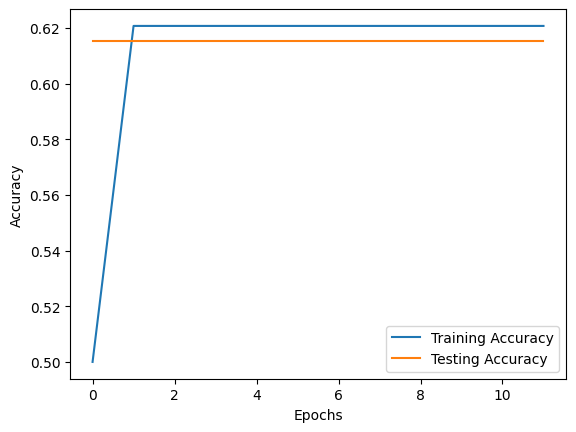

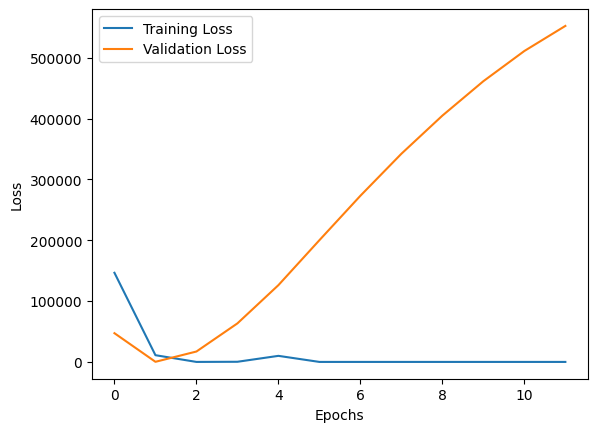

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
# X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=test_ratio, stratify=labels, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), stratify=y_train, random_state=42)

# Normalize the input data (if required)
# X_train = X_train / 255.0
# X_val = X_val / 255.0
# X_test = X_test / 255.0

# Reshape the input data based on the expected input shape of the model
input_shape = X_train.shape[1:]  # Assuming the first dimension is the number of samples
X_train = X_train.reshape((-1,) + input_shape)
X_val = X_val.reshape((-1,) + input_shape)
X_test = X_test.reshape((-1,) + input_shape)

# Build the CNN model
model = tf.keras.Sequential()
model.add(layers.Conv2D(16, kernel_size=(6, 6),strides=1, activation='relu',padding='same', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(32, kernel_size=(3, 3), strides=1,activation='relu',padding='same'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, kernel_size=(3, 3),strides=1, activation='relu',padding='same'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with the desired loss function and optimizer
learning_rate = 0.05  # Specify your desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']

# Generate learning curve
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and testing accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(testing_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot learning curve
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
